In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
    return np.sin(x)+0.5*x

In [4]:
x=np.linspace(-2*np.pi,2*np.pi,50)

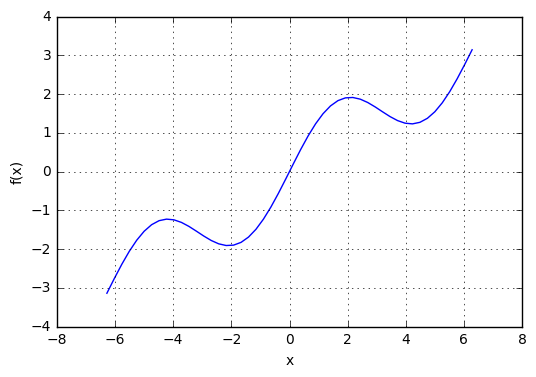

In [9]:
plt.plot(x,f(x),'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [10]:
reg=np.polyfit(x,f(x),deg=1)

In [12]:
ry=np.polyval(reg,x)

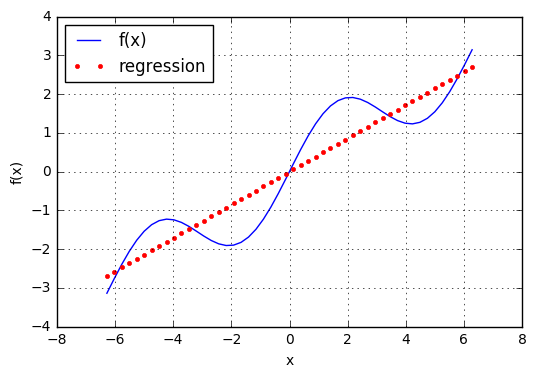

In [19]:
plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [20]:
reg=np.polyfit(x,f(x),deg=5)

In [21]:
ry=np.polyval(reg,x)

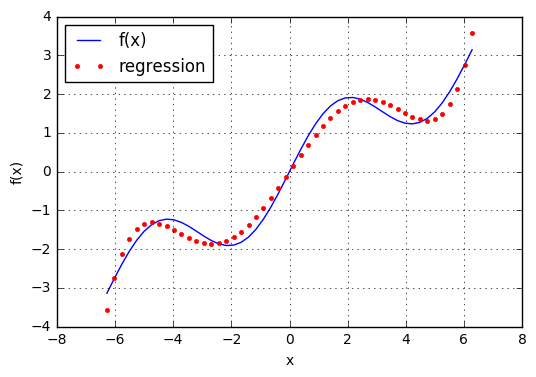

In [28]:
plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [29]:
reg=np.polyfit(x,f(x),7)

In [30]:
ry=np.polyval(reg,x)

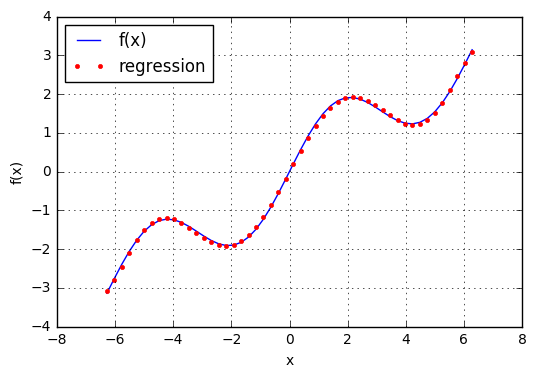

In [36]:
plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [37]:
np.allclose(f(x),ry)

False

In [38]:
np.sum((f(x)-ry)**2)/len(x)

0.0017769134759517628

In [42]:
matrix=np.zeros((3+1,len(x)))
matrix[3,:]=x**3
matrix[2,:]=x**2
matrix[1,:]=x
matrix[0,:]=1

In [45]:
reg=np.linalg.lstsq(matrix.T,f(x))[0]

In [47]:
reg

array([  3.73659739e-16,   5.62777448e-01,   0.00000000e+00,
        -5.43553615e-03])

In [48]:
ry=np.dot(reg,matrix)

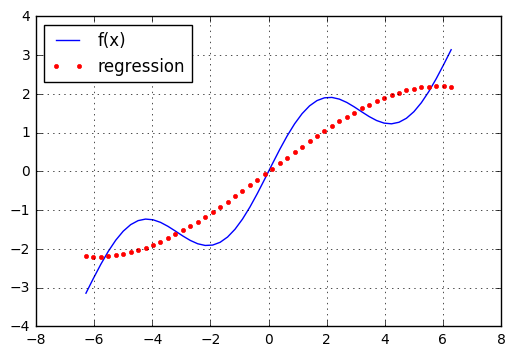

In [53]:
plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)

In [54]:
matrix[3,:]=np.sin(x)

In [55]:
reg=np.linalg.lstsq(matrix.T,f(x))[0]

In [56]:
ry=np.dot(reg,matrix)

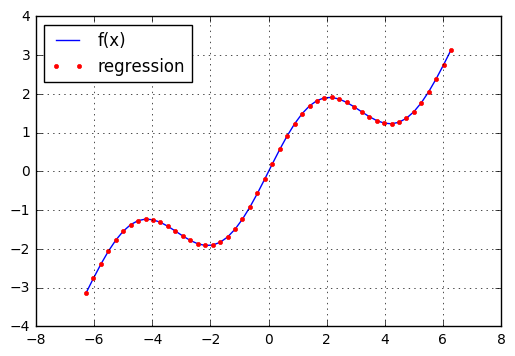

In [57]:
plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)

In [58]:
np.allclose(f(x),ry)

True

In [59]:
np.sum((f(x)-ry)**2)/len(x)

3.1327946847380535e-31

In [60]:
reg

array([  3.73659739e-16,   5.00000000e-01,   0.00000000e+00,
         1.00000000e+00])

In [61]:
xn=np.linspace(-2*np.pi,2*np.pi,50)

In [62]:
xn=xn+0.15*np.random.standard_normal(len(xn))

In [63]:
yn=f(xn)+0.25*np.random.standard_normal(len(xn))

In [64]:
reg=np.polyfit(xn,yn,7)

In [65]:
ry=np.polyval(reg,xn)

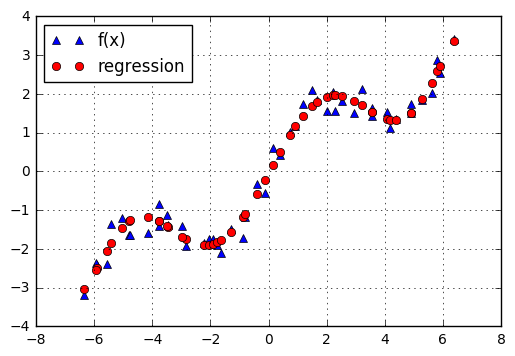

In [69]:
plt.plot(xn,yn,'b^',label='f(x)')
plt.plot(xn,ry,'ro',label='regression')
plt.legend(loc=0)
plt.grid(True)

In [70]:
xu=np.random.rand(50)*4*np.pi-2*np.pi

In [71]:
yu=f(xu)

In [72]:
xu[:10].round(2)

array([ 4.88,  2.97, -1.77,  0.1 , -5.93, -0.13,  2.29, -4.07, -0.34,  0.76])

In [73]:
yu[:10].round(2)

array([ 1.45,  1.66, -1.87,  0.15, -2.62, -0.2 ,  1.9 , -1.23, -0.51,  1.07])

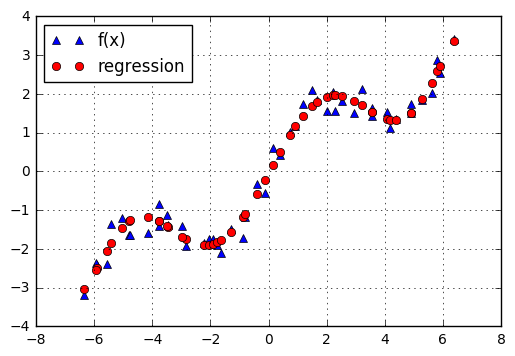

In [74]:
reg=np.polyfit(xn,yn,7)
ry=np.polyval(reg,xn)
plt.plot(xn,yn,'b^',label='f(x)')
plt.plot(xn,ry,'ro',label='regression')
plt.legend(loc=0)
plt.grid(True)

In [75]:
def fm((x,y)):
    return np.sin(x)+0.25*x+np.sqrt(y)+0.05*y**2

In [78]:
x=np.linspace(0,10,20)
y=np.linspace(0,10,20)

In [80]:
X,Y=np.meshgrid(x,y)

In [82]:
Z=fm((X,Y))

In [85]:
x=X.flatten()
y=Y.flatten()

In [86]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

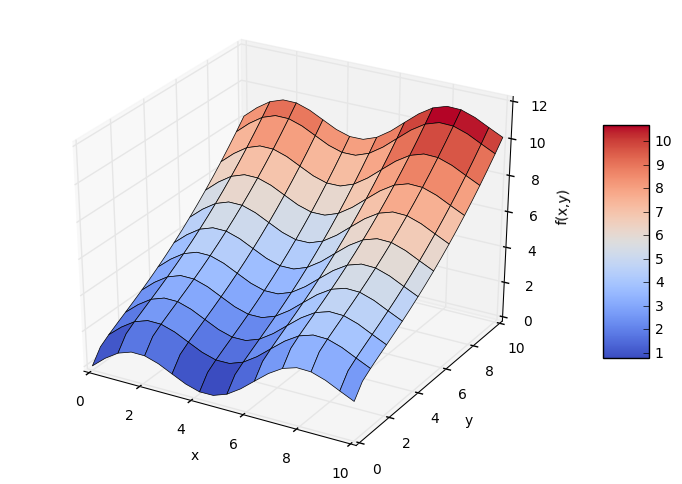

In [95]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,Y,Z,rstride=2,cstride=2,cmap=mpl.cm.coolwarm,linewidth=0.5,antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf,shrink=0.5,aspect=5)

In [98]:
matrix=np.zeros((len(x),6+1))
matrix[:,6]=np.sqrt(y)
matrix[:,5]=np.sin(x)
matrix[:,4]=y**2
matrix[:,3]=x**2
matrix[:,2]=y
matrix[:,1]=x
matrix[:,0]=1

In [99]:
import statsmodels.api as sm

In [100]:
model=sm.OLS(fm((x,y)),matrix).fit()

In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.905e+30
Date:                Mon, 02 Jan 2017   Prob (F-statistic):               0.00
Time:                        14:54:23   Log-Likelihood:                 12170.
No. Observations:                 400   AIC:                        -2.433e+04
Df Residuals:                     393   BIC:                        -2.430e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        2.47e-15   3.82e-15      0.647      0.518     -5.04e-15  9.98e-15
x1             0.2500   9.92e-16   2.52e+14      0.000         0.250     0.250
x2          2.578e-15   3.23e-15      0.798      0.426     -3.78e-15  8.93e-15
x3         -2.047e-16   9.53e-17     -2.148      0.032     -3.92e-16 -1.73e-17
x4             0.0500   1.68e-16   2.98e+14      0.000         0.050     0.050
x5             1.0000   1.19e-15   8.42e+14      0.000         1.000     1.000
x6             1.0000   6.33e-15   1.58e+14      0.000         1.000     1.000
==============================================================================
Omnibus:                       12.011   Durbin-Watson:                   0.154
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.367
Skew:                          -0.229   Prob(JB):                       0.0152
Kurtosis:                       2.460   Cond. No.                         587.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
a=model.params

In [105]:
a

array([  2.47024623e-15,   2.50000000e-01,   2.57843868e-15,
        -2.04697370e-16,   5.00000000e-02,   1.00000000e+00,
         1.00000000e+00])

In [107]:
def reg_func(a,(x,y)):
    f6=a[6]*np.sqrt(y)
    f5=a[5]*np.sin(x)
    f4=a[4]*y**2
    f3=a[3]*y**2
    f2=a[2]*y
    f1=a[1]*x
    f0=a[0]*1
    return (f6+f5+f4+f3+f2+f1+f0)

In [108]:
RZ=reg_func(a,(X,Y))

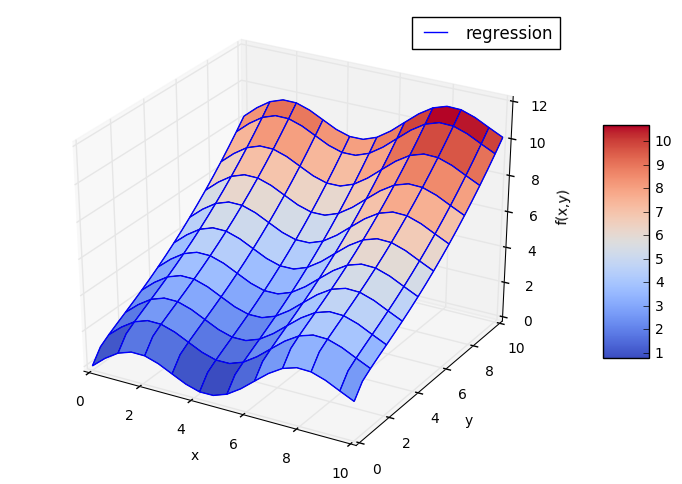

In [113]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca(projection='3d')
surf1=ax.plot_surface(X,Y,Z,rstride=2,cstride=2,cmap=mpl.cm.coolwarm,linewidth=0.5,antialiased=True)
surf2=ax.plot_wireframe(X,Y,RZ,rstride=2,cstride=2,label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.legend()
fig.colorbar(surf,shrink=0.5,aspect=5)

In [114]:
import scipy.interpolate as spi

In [115]:
x=np.linspace(-2*np.pi,2*np.pi,25)

In [116]:
def f(x):
    return np.sin(x)+0.5*x

In [117]:
ipo=spi.splrep(x,f(x),k=1)

In [118]:
iy=spi.splev(x,ipo)

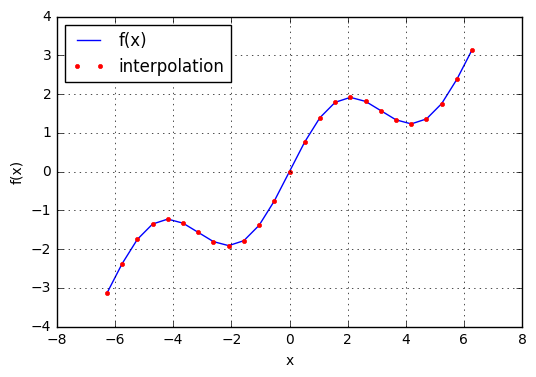

In [119]:
plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,iy,'r.',label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [120]:
np.allclose(f(x),iy)

True

In [121]:
xd=np.linspace(1.0,3.0,50)

In [122]:
iyd=spi.splev(xd,ipo)

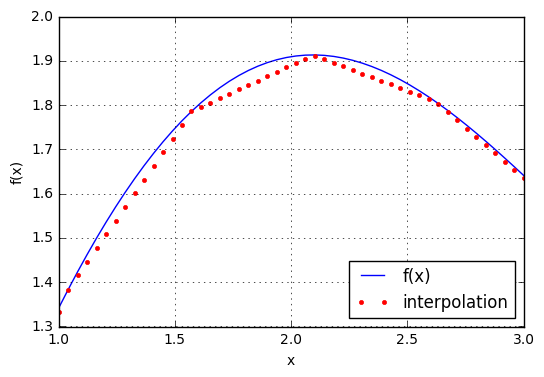

In [129]:
plt.plot(xd,f(xd),'b',label='f(x)')
plt.plot(xd,iyd,'r.',label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [131]:
ipo=spi.splrep(x,f(x),k=3)
iyd=spi.splev(xd,ipo)

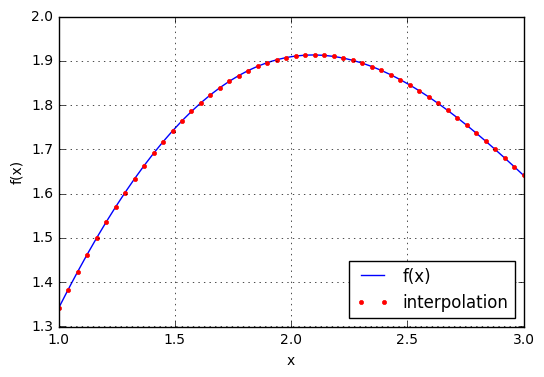

In [132]:
plt.plot(xd,f(xd),'b',label='f(x)')
plt.plot(xd,iyd,'r.',label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [133]:
np.allclose(f(xd),iyd)

False

In [134]:
np.sum((f(xd)-iyd)**2)/len(xd)

1.1349319851436892e-08

In [135]:
def fm((x,y)):
    return (np.sin(x)+0.05*x**2+np.sin(y)+0.05*y**2)

In [138]:
x=np.linspace(-10,10,50)
y=np.linspace(-10,10,50)
X,Y=np.meshgrid(x,y)
Z=fm((X,Y))

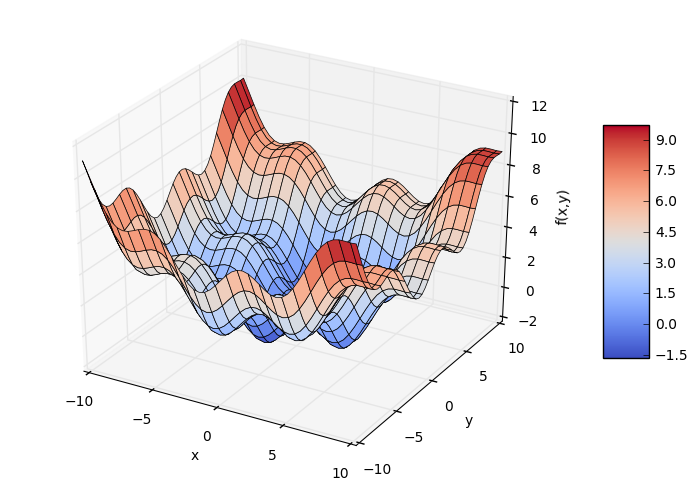

In [144]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,Y,Z,rstride=2,cstride=2,cmap=mpl.cm.coolwarm,linewidth=0.5,antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf,shrink=0.5,aspect=5)

In [145]:
import scipy.optimize as spo

In [146]:
def fo((x,y)):
    z=np.sin(x)+0.05*x**2+np.sin(y)+0.05*y**2
    if output==True:
        print '%8.4f %8.4f %8.4f'%(x,y,z)
    return z

In [147]:
output=True

In [148]:
spo.brute(fo,((-10,10.1,5),(-10,10.1,5)),finish=None)

-10.0000 -10.0000  11.0880
-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([ 0.,  0.])

In [149]:
output=False

In [150]:
opt1=spo.brute(fo,((-10,10.1,0.1),(-10,10.1,0.1)),finish=None)

In [151]:
opt1

array([-1.4, -1.4])

In [152]:
fm(opt1)

-1.7748994599769203

In [153]:
output=True

In [154]:
opt2=spo.fmin(fo,opt1,xtol=0.001,ftol=0.001,maxiter=15,maxfun=20)

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757


In [155]:
opt2

array([-1.42702972, -1.42876755])

In [156]:
fm(opt2)

-1.7757246992239009

In [172]:
from math import sqrt

In [173]:
def Eu((s,b)):
    return -(0.5*sqrt(s*15+b*5)+0.5*sqrt(s*5+b*12))

In [174]:
cons=({'type':'ineq','fun':lambda (s,b):100-s*10-b*10})

In [175]:
bnds=((0,1000),(0,1000))

In [176]:
result=spo.minimize(Eu,[5,5],method='SLSQP',bounds=bnds,constraints=cons)

In [177]:
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 8.02547122,  1.97452878])

In [178]:
result['x']

array([ 8.02547122,  1.97452878])

In [179]:
-result['fun']

9.700883611487832

In [180]:
np.dot(result['x'],[10,10])

99.999999999999986

In [181]:
import scipy.integrate as sci

In [182]:
def f(x):
    return np.sin(x)+0.5*x

In [183]:
a=0.5
b=9.5
x=np.linspace(0,10)
y=f(x)

In [184]:
from matplotlib.patches import Polygon

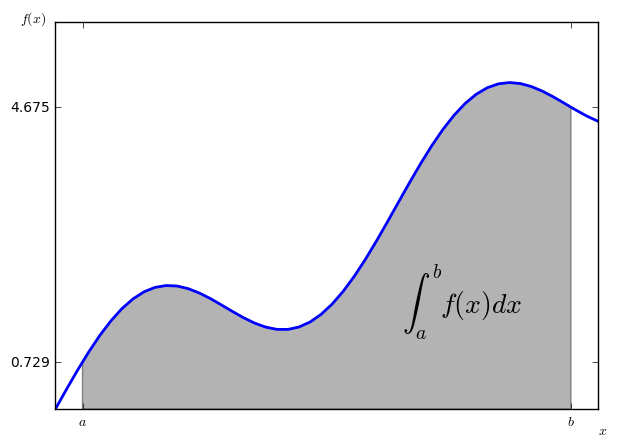

In [197]:
fig,ax=plt.subplots(figsize=(7,5))
plt.plot(x,y,'b',linewidth=2)
plt.ylim(ymin=0)
Ix=np.linspace(a,b)
Iy=f(Ix)
verts=[(a,0)]+list(zip(Ix,Iy))+[(b,0)]
poly=Polygon(verts,facecolor='0.7',edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.75*(a+b),1.5,r"$\int_a^b f(x)dx$",horizontalalignment='center',fontsize=20)
plt.figtext(0.9,0.075,'$x$')
plt.figtext(0.075,0.9,'$f(x)$')
ax.set_xticks((a,b))
ax.set_xticklabels(('$a$','$b$'))
ax.set_yticks([f(a),f(b)])

In [198]:
sci.fixed_quad(f,a,b)[0]

24.366995967084602

In [199]:
sci.quad(f,a,b)[0]

24.374754718086752

In [200]:
sci.romberg(f,a,b)

24.374754718086713

In [201]:
xi=np.linspace(0.5,9.5,25)

In [202]:
sci.trapz(f(xi),xi)

24.352733271544516

In [203]:
sci.simps(f(xi),xi)

24.374964184550748

In [204]:
for i in range(1,20):
    np.random.seed(1000)
    x=np.random.random(i*10)*(b-a)+1
    print np.sum(f(x))/len(x)*(b-a)

25.8012191649
27.2677308663
27.616871267
27.240365651
26.4270818794
25.4407427666
25.0892589852
25.1656034811
25.2373649448
25.3734955223
26.1781939423
26.034078144
25.9073849406
26.2420360604
25.7267925938
26.0119100076
25.8621091571
25.8726222677
25.4234524274


In [205]:
import sympy as sy

In [207]:
x=sy.Symbol('x')
y=sy.Symbol('y')

In [208]:
sy.sqrt(x)

sqrt(x)

In [209]:
3+sy.sqrt(x)-4**2

sqrt(x) - 13

In [210]:
f=x**2+3+0.5*x**2+3/2

In [211]:
sy.simplify(f)

1.5*x**2 + 4

In [212]:
sy.init_printing(pretty_print=False,use_unicode=False)

In [214]:
print sy.pretty(f)

     2    
1.5*x  + 4


In [215]:
print sy.pretty(sy.sqrt(x)+0.5)

  ___      
\/ x  + 0.5


In [216]:
pi_str=str(sy.N(sy.pi,400000))

In [217]:
pi_str[:40]

'3.14159265358979323846264338327950288419'

In [218]:
pi_str[-40:]

'8245672736856312185020980470362464176198'

In [219]:
sy.solve(x**2-1)

[-1, 1]

In [220]:
sy.solve(x**2-1-3)

[-2, 2]

In [221]:
sy.solve(x**3+0.5*x**2-1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [222]:
sy.solve(x**2+y**2)

[{x: -I*y}, {x: I*y}]

In [223]:
a,b=sy.symbols('a b')

In [225]:
print sy.pretty(sy.Integral(sy.sin(x)+0.5*x,(x,a,b)))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [226]:
int_func=sy.integrate(sy.sin(x)+0.5*x,x)

In [228]:
print sy.pretty(int_func)

      2         
0.25*x  - cos(x)


In [229]:
Fb=int_func.subs(x,9.5).evalf()

In [230]:
Fa=int_func.subs(x,0.5).evalf()

In [231]:
Fb-Fa

24.3747547180867

In [232]:
int_func_limits=sy.integrate(sy.sin(x)+0.5*x,(x,a,b))

In [233]:
print sy.pretty(int_func_limits)

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


In [234]:
int_func_limits.subs({a:0.5,b:9.5}).evalf()

24.3747547180868

In [235]:
sy.integrate(sy.sin(x)+0.5*x,(x,0.5,9.5))

24.3747547180867

In [236]:
int_func.diff()

0.5*x + sin(x)

In [237]:
f=(sy.sin(x)+0.05*y**2+sy.sin(y)+0.05*y**2)

In [238]:
del_x=sy.diff(f,x)

In [239]:
del_x

cos(x)

In [240]:
f

0.1*y**2 + sin(x) + sin(y)

In [241]:
del_y=sy.diff(f,y)

In [242]:
del_y

0.2*y + cos(y)

In [243]:
xo=sy.nsolve(del_x,-1.5)

In [244]:
xo

mpf('-1.5707963267948966')

In [245]:
yo=sy.nsolve(del_y,-1.5)

In [246]:
yo

mpf('-1.3064400083695109')

In [247]:
f.subs({x:xo,y:xo}).evalf()

-1.75325988997277